In [30]:
import numpy as np
import pandas as pd
from scipy.fftpack import fft
import matplotlib.pyplot as plt

In [31]:
df=pd.read_csv("imp.csv")

In [32]:
df=pd.read_csv("imp.csv",header=0,index_col=0)

In [33]:
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
X21.V1.791,135,190,229,223,192,125,55,-9,-33,-38,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
X15.V1.924,386,382,356,331,320,315,307,272,244,232,...,164,150,146,152,157,156,154,143,129,1
X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,-94,...,57,64,48,19,-12,-30,-35,-35,-36,5
X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,-79,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,-59,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11500 entries, X21.V1.791 to X16.V1.210
Columns: 179 entries, X1 to y
dtypes: int64(179)
memory usage: 15.8+ MB


In [35]:
df["seizure"]=0
for i in range(11500):
    if df["y"][i] == 1:
        df["seizure"][i] = 1
    else:
        df["seizure"][i] = 0

In [36]:
print(df["seizure"][1])

1


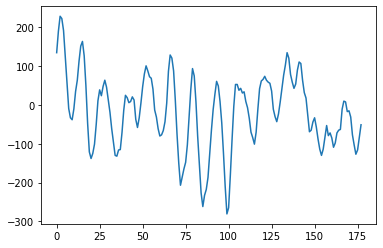

In [37]:
plt.plot(range(178),df.iloc[0,0:178])
plt.show()

In [55]:
target 


array([0, 1, 0, ..., 0, 0, 0])

In [39]:
df_original = df.drop(["seizure", "y"], axis=1)

In [40]:
g = df_original.values

In [41]:
g

array([[ 135,  190,  229, ..., -116,  -83,  -51],
       [ 386,  382,  356, ...,  154,  143,  129],
       [ -32,  -39,  -47, ...,  -35,  -35,  -36],
       ...,
       [  14,    6,  -13, ...,   -2,   -1,   -8],
       [ -40,  -25,   -9, ...,   68,   59,   55],
       [  29,   41,   57, ...,   -2,    2,   20]])

In [42]:
t = fft(g) ## Fourier Transform

In [43]:
type(t)

numpy.ndarray

In [44]:
df = pd.DataFrame(data=t,dtype=complex)

In [45]:
df

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-3010.000000-0.000000j,2446.790792+450.260364j,-2657.829269-1481.143752j,3723.266454-2659.484308j,1650.562647-2466.994586j,918.031493-18.948320j,-202.429242+619.811519j,-294.802718-771.511120j,176.079389-1888.520570j,-504.650611-1214.910117j,...,334.740100+148.376134j,-504.650611+1214.910117j,176.079389+1888.520570j,-294.802718+771.511120j,-202.429242-619.811519j,918.031493+18.948320j,1650.562647+2466.994586j,3723.266454+2659.484308j,-2657.829269+1481.143752j,2446.790792-450.260364j
1,5004.000000-0.000000j,1307.724581-7404.532738j,15020.767668+7130.189030j,-25344.161119+18210.881275j,21871.778701-2423.041744j,15739.921558-8177.167310j,-1253.147988+6344.224700j,12011.708894-11466.934692j,-11522.049649-12855.153754j,-6064.440312-97.089163j,...,-456.674013+632.814344j,-6064.440312+97.089163j,-11522.049649+12855.153754j,12011.708894+11466.934692j,-1253.147988-6344.224700j,15739.921558+8177.167310j,21871.778701+2423.041744j,-25344.161119-18210.881275j,15020.767668-7130.189030j,1307.724581+7404.532738j
2,-7840.000000-0.000000j,936.496752-664.893496j,440.289506+2359.520081j,-347.459321+1292.812690j,-806.898519+1090.135575j,676.089935+1077.245652j,-273.567749-826.970569j,626.621552-1154.763492j,877.326201+1371.650362j,85.266287+1377.544734j,...,573.438475-508.265827j,85.266287-1377.544734j,877.326201-1371.650362j,626.621552+1154.763492j,-273.567749+826.970569j,676.089935-1077.245652j,-806.898519-1090.135575j,-347.459321-1292.812690j,440.289506-2359.520081j,936.496752+664.893496j
3,-12266.000000-0.000000j,-654.541662+10.781029j,85.298621+611.952118j,-519.449332-90.799334j,-407.503142+250.124809j,60.813056-145.825609j,-163.169987-66.759576j,-600.328983+190.555823j,53.897860-81.703121j,409.127836+108.072400j,...,-66.052823+86.200444j,409.127836-108.072400j,53.897860+81.703121j,-600.328983-190.555823j,-163.169987+66.759576j,60.813056+145.825609j,-407.503142-250.124809j,-519.449332+90.799334j,85.298621-611.952118j,-654.541662-10.781029j
4,-1184.000000-0.000000j,-1599.385327+2043.789895j,-685.634998+245.900831j,-892.832855+710.693729j,-699.408701-209.596507j,-487.089669+895.536939j,-254.288330+417.071151j,-198.876374-459.240454j,244.165460+571.911329j,-589.041889-749.126341j,...,-153.530861+792.393200j,-589.041889+749.126341j,244.165460-571.911329j,-198.876374+459.240454j,-254.288330-417.071151j,-487.089669-895.536939j,-699.408701+209.596507j,-892.832855-710.693729j,-685.634998-245.900831j,-1599.385327-2043.789895j
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11495,918.000000-0.000000j,-2286.244898+2768.262752j,273.755923+1169.976631j,-484.611251+438.475690j,-1344.300735+542.295625j,1098.348586+472.531924j,25.116883+236.017893j,696.304398+746.541133j,-1251.810079-1171.639106j,41.555513-392.903751j,...,221.560505-157.123228j,41.555513+392.903751j,-1251.810079+1171.639106j,696.304398-746.541133j,25.116883-236.017893j,1098.348586-472.531924j,-1344.300735-542.295625j,-484.611251-438.475690j,273.755923-1169.976631j,-2286.244898-2768.262752j
11496,1010.000000-0.000000j,-916.002363+2690.777855j,-1501.123754+958.784905j,-2830.455160-2213.190013j,3475.574913-6790.009000j,5763.784546+2756.706849j,9962.148069-6609.137847j,3824.263360+675.520967j,-4665.711943+4330.506391j,-1772.244885-168.435950j,...,-5033.540588-963.464592j,-1772.244885+168.435950j,-4665.711943-4330.506391j,3824.263360-675.520967j,9962.148069+6609.137847j,5763.784546-2756.706849j,3475.574913+6790.009000j,-2830.455160+2213.190013j,-1501.123754-958.784905j,-916.002363-2690.777855j
11497,1202.000000-0.000000j,-1370.817224-1786.423146j,-406.881330-3340.193167j,-40.298656-127.313875j,-950.138682-441.349213j,585.686639-155.884641j,214.391034-27.330989j,271.479365+102.148234j,441.518692-33.539376j,376.319706-412.083142j,...,-291.293838-29.409101j,376.319706+412.083142j,441.518692+33.539376j,271.479365-102.148234j,214.391034+27.330989j,585.686639+155.884641j,-950.138682+441.349213j,-4

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


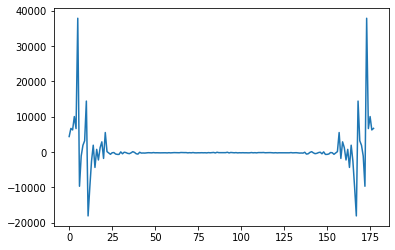

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


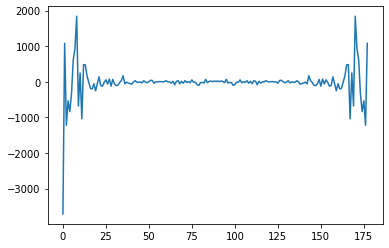

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


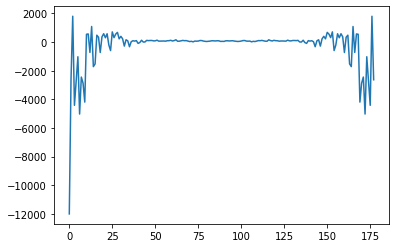

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


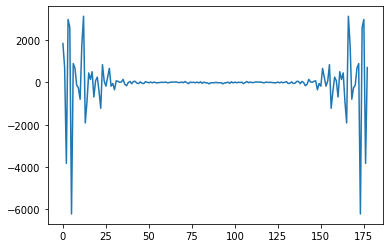

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


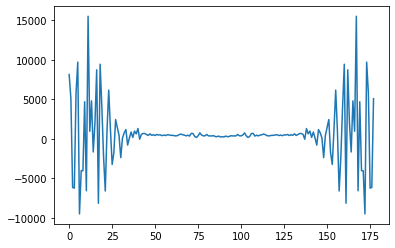

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


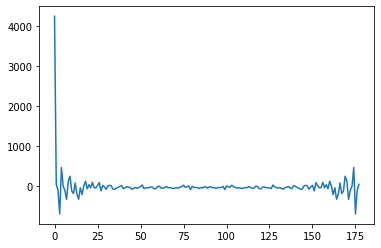

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


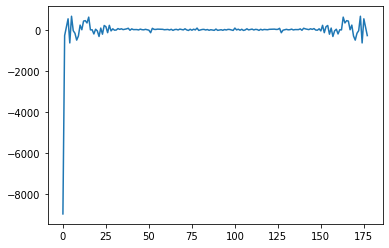

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


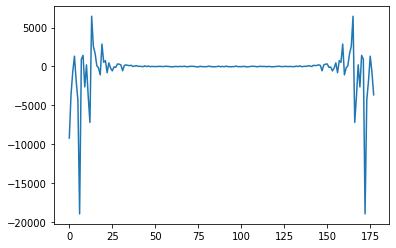

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


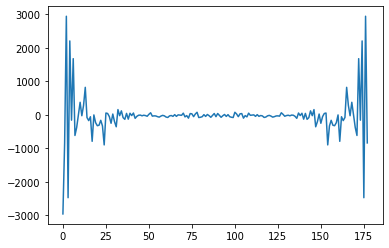

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


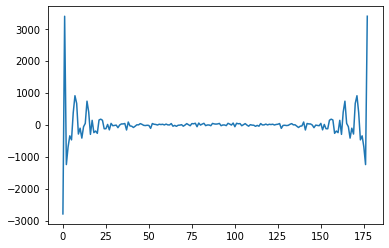

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


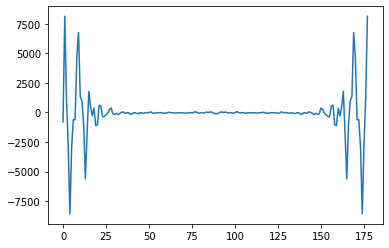

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


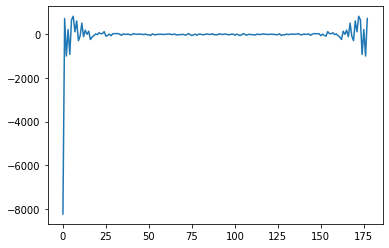

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


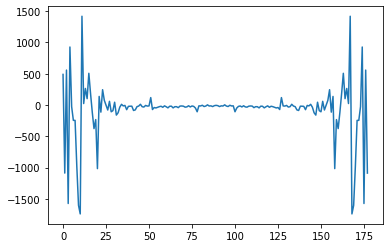

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


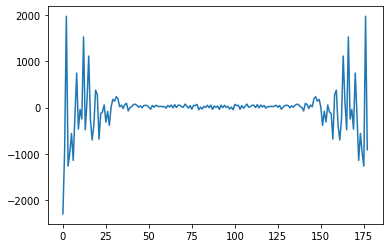

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


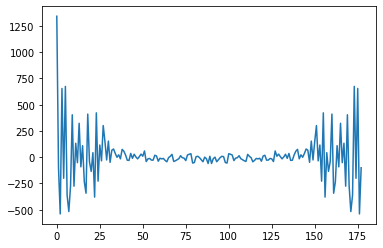

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


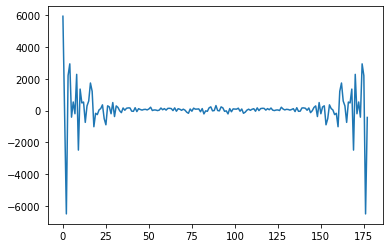

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


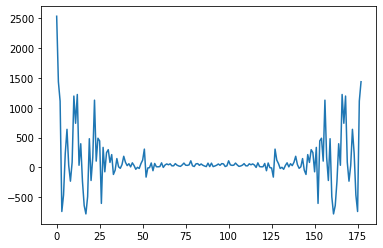

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


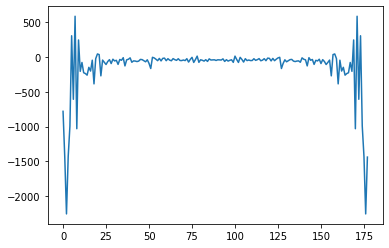

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


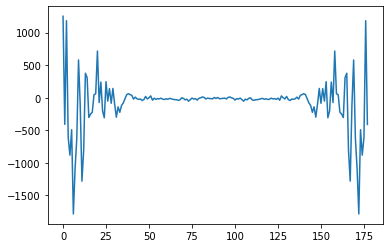

/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


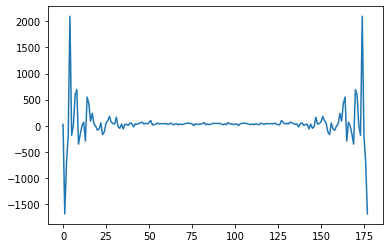

In [46]:
for i in range(20,40):
    plt.plot(range(178),df.iloc[i,0:178])

    plt.show()

In [47]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,168,169,170,171,172,173,174,175,176,177
0,-3010.000000-0.000000j,2446.790792+450.260364j,-2657.829269-1481.143752j,3723.266454-2659.484308j,1650.562647-2466.994586j,918.031493-18.948320j,-202.429242+619.811519j,-294.802718-771.511120j,176.079389-1888.520570j,-504.650611-1214.910117j,...,334.740100+148.376134j,-504.650611+1214.910117j,176.079389+1888.520570j,-294.802718+771.511120j,-202.429242-619.811519j,918.031493+18.948320j,1650.562647+2466.994586j,3723.266454+2659.484308j,-2657.829269+1481.143752j,2446.790792-450.260364j
1,5004.000000-0.000000j,1307.724581-7404.532738j,15020.767668+7130.189030j,-25344.161119+18210.881275j,21871.778701-2423.041744j,15739.921558-8177.167310j,-1253.147988+6344.224700j,12011.708894-11466.934692j,-11522.049649-12855.153754j,-6064.440312-97.089163j,...,-456.674013+632.814344j,-6064.440312+97.089163j,-11522.049649+12855.153754j,12011.708894+11466.934692j,-1253.147988-6344.224700j,15739.921558+8177.167310j,21871.778701+2423.041744j,-25344.161119-18210.881275j,15020.767668-7130.189030j,1307.724581+7404.532738j
2,-7840.000000-0.000000j,936.496752-664.893496j,440.289506+2359.520081j,-347.459321+1292.812690j,-806.898519+1090.135575j,676.089935+1077.245652j,-273.567749-826.970569j,626.621552-1154.763492j,877.326201+1371.650362j,85.266287+1377.544734j,...,573.438475-508.265827j,85.266287-1377.544734j,877.326201-1371.650362j,626.621552+1154.763492j,-273.567749+826.970569j,676.089935-1077.245652j,-806.898519-1090.135575j,-347.459321-1292.812690j,440.289506-2359.520081j,936.496752+664.893496j
3,-12266.000000-0.000000j,-654.541662+10.781029j,85.298621+611.952118j,-519.449332-90.799334j,-407.503142+250.124809j,60.813056-145.825609j,-163.169987-66.759576j,-600.328983+190.555823j,53.897860-81.703121j,409.127836+108.072400j,...,-66.052823+86.200444j,409.127836-108.072400j,53.897860+81.703121j,-600.328983-190.555823j,-163.169987+66.759576j,60.813056+145.825609j,-407.503142-250.124809j,-519.449332+90.799334j,85.298621-611.952118j,-654.541662-10.781029j
4,-1184.000000-0.000000j,-1599.385327+2043.789895j,-685.634998+245.900831j,-892.832855+710.693729j,-699.408701-209.596507j,-487.089669+895.536939j,-254.288330+417.071151j,-198.876374-459.240454j,244.165460+571.911329j,-589.041889-749.126341j,...,-153.530861+792.393200j,-589.041889+749.126341j,244.165460-571.911329j,-198.876374+459.240454j,-254.288330-417.071151j,-487.089669-895.536939j,-699.408701+209.596507j,-892.832855-710.693729j,-685.634998-245.900831j,-1599.385327-2043.789895j


In [48]:
mean = df.mean(axis=0)
print(mean)

0     -1374.593652+0.000000j
1        0.043866-62.309695j
2      -73.385819-14.357052j
3     -116.451812-26.731474j
4      -45.805567-52.041388j
               ...          
173     -14.893126+8.724771j
174    -45.805567+52.041388j
175   -116.451812+26.731474j
176    -73.385819+14.357052j
177      0.043866+62.309695j
Length: 178, dtype: complex128


In [49]:
df -= mean
print(df_original)

             X1   X2   X3   X4   X5   X6   X7   X8   X9  X10  ...  X169  X170  \
X21.V1.791  135  190  229  223  192  125   55   -9  -33  -38  ...     8   -17   
X15.V1.924  386  382  356  331  320  315  307  272  244  232  ...   168   164   
X8.V1.1     -32  -39  -47  -37  -32  -36  -57  -73  -85  -94  ...    29    57   
X16.V1.60  -105 -101  -96  -92  -89  -95 -102 -100  -87  -79  ...   -80   -82   
X20.V1.54    -9  -65  -98 -102  -78  -48  -16    0  -21  -59  ...    10     4   
...         ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   
X22.V1.114  -22  -22  -23  -26  -36  -42  -45  -42  -45  -49  ...    20    15   
X19.V1.354  -47  -11   28   77  141  211  246  240  193  136  ...   -94   -65   
X8.V1.28     14    6  -13  -16   10   26   27   -9    4   14  ...   -42   -65   
X10.V1.932  -40  -25   -9  -12   -2   12    7   19   22   29  ...   114   121   
X16.V1.210   29   41   57   72   74   62   54   43   31   23  ...   -94   -59   

            X171  X172  X17

In [50]:
std = df.std(axis=0)
print(std)

0      5823.223309
1      4981.734870
2      5491.402997
3      5280.856973
4      5821.917205
          ...     
173    6350.364620
174    5821.917205
175    5280.856973
176    5491.402997
177    4981.734870
Length: 178, dtype: float64


In [51]:
df/= std
print(df)

                      0                   1                   2    \
0     -0.280842+0.000000j  0.491144+0.102890j -0.470634-0.267106j   
1      1.095372-0.000000j  0.262495-1.473829j  2.748688+1.301042j   
2     -1.110280+0.000000j  0.187977-0.120959j  0.093542+0.432290j   
3     -1.870340+0.000000j -0.131397+0.014672j  0.028897+0.114053j   
4      0.032730-0.000000j -0.321059+0.422764j -0.111492+0.047394j   
...                   ...                 ...                 ...   
11495  0.393698-0.000000j -0.458934+0.568190j  0.063215+0.215671j   
11496  0.409497-0.000000j -0.183881+0.552636j -0.259995+0.177212j   
11497  0.442469-0.000000j -0.275177-0.346087j -0.060730-0.605644j   
11498 -0.951261+0.000000j  0.259211+0.056468j  0.557244+0.249430j   
11499  0.171485-0.000000j  0.078169+0.144050j  0.354551-0.406749j   

                      3                   4                   5    \
0      0.727101-0.498547j  0.291376-0.414804j  0.146909-0.001610j   
1     -4.777200+3.453533j  3.7646

In [53]:
target

array([0, 1, 0, ..., 0, 0, 0])

In [56]:
from keras.models import Sequential
from keras import layers
from keras import regularizers
model = Sequential()
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.001), input_shape = (178,)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation="relu", kernel_regularizer=regularizers.l1(0.001)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation="sigmoid"))

Using TensorFlow backend.
/home/gautham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gautham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gautham/anaconda3/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gautham/anaconda3/lib/python3.7/site-packages/t

Instructions for updating:
Colocations handled automatically by placer.


In [57]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 64)                11456     
_________________________________________________________________
dropout_1 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dropout_2 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 15,681
Trainable params: 15,681
Non-trainable params: 0
_________________________________________________________________


In [58]:


from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df, target, test_size=0.2, random_state=42)

In [59]:
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [60]:


history = model.fit(x_train, y_train, epochs=100, batch_size=128, validation_split=0.2, verbose=2)



Instructions for updating:
Use tf.cast instead.
Train on 7360 samples, validate on 1840 samples
Epoch 1/100


/home/gautham/anaconda3/lib/python3.7/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


 - 1s - loss: 1.8818 - acc: 0.7024 - val_loss: 1.6816 - val_acc: 0.8245
Epoch 2/100
 - 0s - loss: 1.5437 - acc: 0.8591 - val_loss: 1.3692 - val_acc: 0.8598
Epoch 3/100
 - 0s - loss: 1.2462 - acc: 0.8902 - val_loss: 1.0935 - val_acc: 0.8951
Epoch 4/100
 - 0s - loss: 1.0288 - acc: 0.9073 - val_loss: 0.9063 - val_acc: 0.9130
Epoch 5/100
 - 0s - loss: 0.8594 - acc: 0.9185 - val_loss: 0.7646 - val_acc: 0.9217
Epoch 6/100
 - 0s - loss: 0.7283 - acc: 0.9236 - val_loss: 0.6523 - val_acc: 0.9223
Epoch 7/100
 - 0s - loss: 0.6148 - acc: 0.9326 - val_loss: 0.5596 - val_acc: 0.9250
Epoch 8/100
 - 0s - loss: 0.5270 - acc: 0.9361 - val_loss: 0.4887 - val_acc: 0.9310
Epoch 9/100
 - 0s - loss: 0.4629 - acc: 0.9391 - val_loss: 0.4350 - val_acc: 0.9321
Epoch 10/100
 - 0s - loss: 0.4268 - acc: 0.9374 - val_loss: 0.3973 - val_acc: 0.9386
Epoch 11/100
 - 0s - loss: 0.3960 - acc: 0.9380 - val_loss: 0.3656 - val_acc: 0.9408
Epoch 12/100
 - 0s - loss: 0.3672 - acc: 0.9416 - val_loss: 0.3471 - val_acc: 0.9342
E

Epoch 98/100
 - 0s - loss: 0.2143 - acc: 0.9577 - val_loss: 0.2043 - val_acc: 0.9554
Epoch 99/100
 - 0s - loss: 0.2175 - acc: 0.9554 - val_loss: 0.2000 - val_acc: 0.9576
Epoch 100/100
 - 0s - loss: 0.2114 - acc: 0.9554 - val_loss: 0.1991 - val_acc: 0.9582


In [61]:
loss_train = history.history['loss']
loss_val = history.history['val_loss']

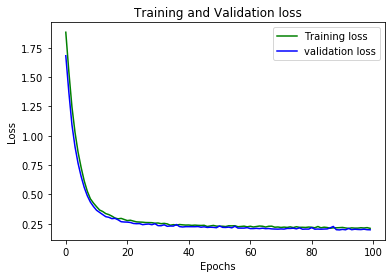

In [62]:
plt.plot( loss_train, 'g', label='Training loss')
plt.plot( loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [63]:
print(history.history['acc'][99])

0.9554348


In [ ]:
# We are getting accuracy of about 95.54348% after appying fourier transform using dense neural network.